### Exploratory Data Analysis

### Data Pre-Processing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [2]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)




*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.



*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.





In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [6]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [8]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [10]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket.



In [11]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [12]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.



*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match RR vs KKR

In [61]:
#First Lets see head-head results
df_KKR_RR = df_matches[((df_matches['team1'] == 'Kolkata Knight Riders') | (df_matches['team1'] == 'Rajasthan Royals')) & 
                        ((df_matches['team2'] == 'Kolkata Knight Riders') | (df_matches['team2'] == 'Rajasthan Royals'))] 

#plotting RR and KKR wins against each other
import plotly.graph_objs as go
df_winner = df_KKR_RR[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)[:2]

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by KKR and RR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

They played 20 head-head matches KKR and RR won won 10 matches each.


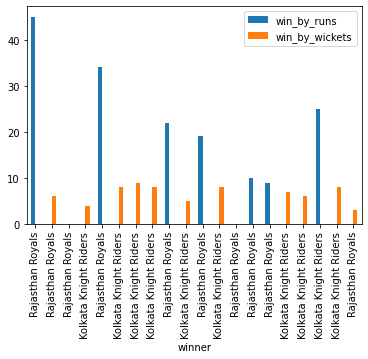

In [64]:
#Lets look at how each tean won the matches i.e weather batting first or bowling first
import matplotlib.pyplot as plt
df_KKR_RR = df_KKR_RR[['win_by_runs','win_by_wickets','winner']]
df_KKR_RR.plot( "winner", kind="bar")



*   RR won most of the matches when they are batting first and KKR won more matches when they are bowling first. 2 matches are went to superover.
*   So today match is about Best chasing team(KKR) and best defending team(RR).

Now i am calcualting which team has more match winners.



In [63]:
#Lets look at how many player of the match awards won by current KKR and RR players.
#Note: I am taking top 8 palyers from both teams
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_RR = df_matches[(df_matches['player_of_match'] == 'SV Samson') | (df_matches['player_of_match'] == 'BA Stokes') |
                                (df_matches['player_of_match'] == 'RV Uthappa') | (df_matches['player_of_match'] == 'JC Buttler') |
                                (df_matches['player_of_match'] == 'SPD Smith') | (df_matches['player_of_match'] == 'S Gopal') |
                                (df_matches['player_of_match'] == 'J Archer') | (df_matches['player_of_match'] == 'R Tewatia')] 


print("Total number of man of matches won by present Rajasthan players is", df_man_of_match_RR.shape[0],'\n')  

#In KKR i am not picking russell because he is injured may be he will not play today match.
df_man_of_match_KKR = df_matches[(df_matches['player_of_match'] == 'KD Karthik') | (df_matches['player_of_match'] == 'RA Tripathi') |
                                (df_matches['player_of_match'] == 'PJ Cummins') | (df_matches['player_of_match'] == 'SP Narine') |
                                (df_matches['player_of_match'] == 'EJG Morgan') | (df_matches['player_of_match'] == 'N Rana') |
                                (df_matches['player_of_match'] == 'S Gill') | (df_matches['player_of_match'] == 'LH Ferguson')]


print("Total number of man of matches won by present KKR players is", df_man_of_match_KKR.shape[0])

Total number of man of matches won by present Rajasthan players is 28 

Total number of man of matches won by present KKR players is 21




*   RR players won more man of the match awards then KKR players. So i can say RR has more match winners. 
*   According to above all the analysis i am predcting RR will win today match.



### Q2) How many wickets will fall in total during the match?

In [21]:
df_RRKKR = df_deliveries[(df_deliveries['batting_team'] == 'Rajasthan Royals') & (df_deliveries['bowling_team'] == 'Kolkata Knight Riders') |
                         (df_deliveries['batting_team'] == 'Kolkata Knight Riders') & (df_deliveries['bowling_team'] == 'Rajasthan Royals')]
df_RRKKR.head(2)   

df_wickets = df_RRKKR[df_RRKKR['player_dismissed'] != 'No Wicket']
df_wickets = df_wickets.groupby('match_id',as_index=False)['player_dismissed'].count()
df_wickets.rename(columns={'player_dismissed':'Number_of_wickets'}, inplace=True)
df_wickets.head()


,match_id,Number_of_wickets
0,78,17
1,105,12
2,126,15
3,168,15
4,187,12


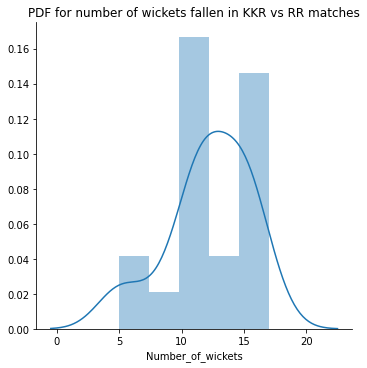

count    20.000000
mean     12.200000
std       3.334035
min       5.000000
25%      11.000000
50%      12.000000
75%      15.000000
max      17.000000
Name: Number_of_wickets, dtype: float64

In [22]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_wickets,size=5) \
   .map(sns.distplot, "Number_of_wickets") \
   .add_legend();

plt.title("PDF for number of wickets fallen in KKR vs RR matches")
plt.show();

#Printing central tendency and percentile values
df_wickets['Number_of_wickets'].describe()

**Conclusion :-**



*   From above PDF plot i can say that wickets between 10-12 and 15-17 the probability is very high. 
*   Mean,median is 12 and in 75% of the matches wickets fallen are less than 15. Maximum wickets fall in a single match is 17.

So according to above all observations i am predicting in today match they will loose 11-15 wickets.



### Q3) Which batsman will have the highest no.of runs scored through boundaries - no.of runs scored 1s2s3s to total runs scored ratio in the match?

In [30]:
#Taking 10 batsmans from both teams(According to given options)
df_batsmans_KKRRR = df_deliveries[(df_deliveries['batsman'] == 'S Gill') | (df_deliveries['batsman'] == 'KD Karthik') |
                                 (df_deliveries['batsman'] == 'N Rana') | (df_deliveries['batsman'] == 'EJG Morgan') |
                                 (df_deliveries['batsman'] == 'R Tewatia') | (df_deliveries['batsman'] == 'SPD Smith') |
                                 (df_deliveries['batsman'] == 'SV Samson') | (df_deliveries['batsman'] == 'BA Stokes') |
                                 (df_deliveries['batsman'] == 'RV Uthappa') | (df_deliveries['batsman'] == 'JC Buttler')]

#First calcualting total runs scored by every batsman in all matches 
total_runs = df_batsmans_KKRRR.groupby('batsman')['batsman_runs'].sum()
df_total_runs = total_runs.to_frame().reset_index()
df_total_runs.rename(columns = {'batsman_runs':'total_runs'}, inplace = True) 
df_total_runs.head(10)

,batsman,total_runs
0,BA Stokes,647
1,EJG Morgan,854
2,JC Buttler,1431
3,KD Karthik,3688
4,N Rana,1104
5,R Tewatia,119
6,RV Uthappa,4446
7,S Gill,517
8,SPD Smith,2047
9,SV Samson,2235


In [31]:
#Now taking only 4's and 6's rows from above dataframe
#I saw in dataset some rows showing batsman runs = 5 or 7 but we dont know weather these runs are coming from boundaries or not.
#So i am considering those rows as outliers and taking only 4 and 6.

df_4s6s = df_batsmans_KKRRR[(df_batsmans_KKRRR['batsman_runs'] == 4) | (df_batsmans_KKRRR['batsman_runs'] == 6)]

boundaries_runs = df_4s6s.groupby('batsman')['batsman_runs'].sum()
df_boundaries_runs = boundaries_runs.to_frame().reset_index()
df_boundaries_runs.rename(columns = {'batsman_runs':'boundaries_runs'}, inplace = True) 

#Calculating 1s2s3s runs
df_1s2s3s = df_batsmans_KKRRR[(df_batsmans_KKRRR['batsman_runs'] >= 1) & (df_batsmans_KKRRR['batsman_runs'] <= 3)]

runs = df_1s2s3s.groupby('batsman')['batsman_runs'].sum()
df_1s2s3s_runs = runs.to_frame().reset_index()
df_1s2s3s_runs.rename(columns = {'batsman_runs':'1s2s3s_runs'}, inplace = True) 

#Now merging boundaries and 1s2s3s dataframe
df_boundaries_1s2s3s = pd.merge(df_boundaries_runs, df_1s2s3s_runs, left_on='batsman',right_on='batsman', how='outer')
df_boundaries_1s2s3s.head(10)

,batsman,boundaries_runs,1s2s3s_runs
0,BA Stokes,322,325
1,EJG Morgan,492,362
2,JC Buttler,938,488
3,KD Karthik,2038,1635
4,N Rana,700,399
5,R Tewatia,62,57
6,RV Uthappa,2680,1746
7,S Gill,270,247
8,SPD Smith,1018,1029
9,SV Samson,1218,1017


In [32]:
#Now first merging above dataframes then calculating ratio for each batsman
df_ratio = pd.merge(df_boundaries_1s2s3s, df_total_runs, left_on='batsman',right_on='batsman', how='outer')

df_ratio['ratio'] = (df_ratio['boundaries_runs'] - df_ratio['1s2s3s_runs']) / df_ratio['total_runs']
df_ratio.head(10)

,batsman,boundaries_runs,1s2s3s_runs,total_runs,ratio
0,BA Stokes,322,325,647,-0.004637
1,EJG Morgan,492,362,854,0.152225
2,JC Buttler,938,488,1431,0.314465
3,KD Karthik,2038,1635,3688,0.109273
4,N Rana,700,399,1104,0.272645
5,R Tewatia,62,57,119,0.042017
6,RV Uthappa,2680,1746,4446,0.210076
7,S Gill,270,247,517,0.044487
8,SPD Smith,1018,1029,2047,-0.005374
9,SV Samson,1218,1017,2235,0.089933


**Conclusion :-**


*   According to above analysis Buttler, Rana and Uthappa has highest ratio
*   Out of above 3 batsman buttler and Uthappa are in same option in given question. So i am predicting Uthappa or bttler will have highest ratio.



### Q4) What will be Jofra Archer's Economy rate and how many boundaries will he give away in his 4overs?

In [48]:
#I am calculating his economy in all the matches he played not only against KKR because he is playing IPL from 2018 only
#So we have very less data about him against KKR
df_archer = df_deliveries[(df_deliveries['bowler'] == 'J Archer')]

#First calcualting number of runs he give away in each match. Wides,no-balls,batsman_runs comes under bowler runs.
df_runs_given = df_archer.groupby('match_id',as_index=False)['batsman_runs','wide_runs','noball_runs'].sum()
df_runs_given['total_runs_given'] = df_runs_given['batsman_runs'] + df_runs_given['wide_runs'] + df_runs_given['noball_runs']
df_runs_given = df_runs_given[['match_id','total_runs_given']]

#Now calculating no_of_boundaries he given
df_boundaries = df_archer[(df_archer['batsman_runs'] == 4) | (df_archer['batsman_runs'] == 6)]
df_no_of_boundaries = df_boundaries.groupby('match_id',as_index=False)['batsman_runs'].count()
df_no_of_boundaries.rename(columns={'batsman_runs':'no_of_boundaries_given'},inplace=True)

#Now merging above both dataframes
df_runs_boundaries = pd.merge(df_runs_given, df_no_of_boundaries, left_on='match_id',right_on='match_id', how='outer')
df_runs_boundaries.head(2)

,match_id,total_runs_given,no_of_boundaries_given
0,7914,23,3.0
1,7921,27,3.0


In [49]:
#Now calculating number of balls he bowled 
#Wides and no-balls are not comes under bowler deliveries. So i am removing that. 
df_balls = df_archer[(df_archer['wide_runs'] == 0) & (df_archer['noball_runs'] == 0)]

df_balls = df_balls.groupby('match_id',as_index=False)['ball'].count()
df_balls.rename(columns = {'ball':'no_of_balls_bowled'}, inplace=True)
df_balls.head(2)

,match_id,no_of_balls_bowled
0,7914,24
1,7921,24


In [50]:
#Now i am calculating his economy in each match after merging above 2 dataframes
df_economy = pd.merge(df_runs_boundaries, df_balls, left_on='match_id',right_on='match_id', how='outer')
df_economy['economy_rate'] = round((df_economy['total_runs_given'] / df_economy['no_of_balls_bowled'])*6,2)
df_economy.head()

,match_id,total_runs_given,no_of_boundaries_given,no_of_balls_bowled,economy_rate
0,7914,23,3.0,24,5.75
1,7921,27,3.0,24,6.75
2,7925,32,5.0,19,10.11
3,7931,44,6.0,22,12.00
4,7933,32,4.0,24,8.00


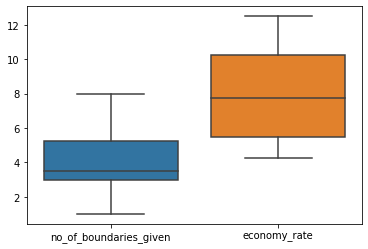

In [52]:
df_economy = df_economy[['no_of_boundaries_given','economy_rate']]
ax = sns.boxplot(data=df_economy)


**Conclusion :-**



*   From above boxplot i can say that 50% of the matches his economy lies between 6 - 10. 
*  In half of the matches he played his economy is greater than 8 and 3rd quartile or 75% of matches his economy less than 10.



*   In 50 to 75% of the matches he given 4-5 boundaries.




So according to above analysis his economy in today match is greater than 8 and boundaries are greater than 4.



### Q5) How many bowlers in the match from both teams will have a economy rate of less than 8?

In [53]:
#Calculating number of runs given by bowler in each match.
#wides,no-balls,penalty runs and batsman runs are go against the bowler cocnceeded runs.
df_bowlers = df_deliveries.groupby(['match_id','bowler'], as_index=False)['batsman_runs','wide_runs','noball_runs','penalty_runs'].sum()
df_bowlers['runs_conceded'] = df_bowlers['batsman_runs'] + df_bowlers['wide_runs'] + df_bowlers['noball_runs'] + df_bowlers['penalty_runs']

#We want only runs conceeded column along with bowler and match_id
df_runs_conceded = df_bowlers[['match_id','bowler','runs_conceded']]

df_runs_conceded.head(3)

,match_id,bowler,runs_conceded
0,1,A Choudhary,55
1,1,A Nehra,42
2,1,B Kumar,27


In [54]:
#Calcualting number of balls bowled by bowler in each match
df_balls = df_deliveries[(df_deliveries['wide_runs'] == 0) & (df_deliveries['noball_runs'] == 0)]
df_balls = df_balls.groupby(['match_id','bowler'])['ball'].count()
df_balls = df_balls.to_frame().reset_index()
df_balls.rename(columns={'ball':'balls_bowled'}, inplace=True)
df_balls.head(3)

,match_id,bowler,balls_bowled
0,1,A Choudhary,24
1,1,A Nehra,24
2,1,B Kumar,24


In [55]:
#Now we can merge above dataframes 
df_economy_rate = df_runs_conceded.merge(df_balls, how = 'outer', on = ['match_id', 'bowler'])
#Now calcualting economy rate by using above two dataframes
df_economy_rate['economy_rate'] = round((df_economy_rate['runs_conceded'] / df_economy_rate['balls_bowled'])*6,2)
df_economy_rate.head(2)

,match_id,bowler,runs_conceded,balls_bowled,economy_rate
0,1,A Choudhary,55,24.0,13.75
1,1,A Nehra,42,24.0,10.50




*   I calculated economy rate of all the bowlers in IPL. But i want to see the economy rate of only bowlers who are playing in today match
*   So i am expecting Archer,Shreyas gopal, Tewatia, stokes and Kartik tyagi are 5 bowlers from Rajasthan team.



*   From RCB team Cummins, Ferguson, Narine, varun chakravarthy and Nagarkoti are 5 bowlers who are expected to play in today match.
*   In question clearly mentioned that bowler has to bowl more than 1 over. I.e also i am taking into consideration.





In [58]:
#Filtering current RR and KKR bowlers and they have to bowl more than 1 over.
#Kartik tyagi, Nagarkoti playing theier first IPL season and We also dont have enough data for chakravarthy.
df_economy_rate_RRKKR = df_economy_rate[((df_economy_rate['bowler'] == 'J Archer') | (df_economy_rate['bowler'] == 'S Gopal') |
                                        (df_economy_rate['bowler'] == 'BA Stokes') | (df_economy_rate['bowler'] == 'R Tewatia') |
                                        (df_economy_rate['bowler'] == 'PJ Cummins') | (df_economy_rate['bowler'] == 'SP Narine') |
                                        (df_economy_rate['bowler'] == 'LH Ferguson')) &
                                        (df_economy_rate['balls_bowled'] > 6)]

df_economy_rate_RRKKR.head()  

,match_id,bowler,runs_conceded,balls_bowled,economy_rate
16,2,BA Stokes,36,24.0,9.00
35,3,SP Narine,33,24.0,8.25
40,4,BA Stokes,32,24.0,8.00
56,5,PJ Cummins,29,24.0,7.25
82,7,SP Narine,22,24.0,5.50


Text(0, 0.5, 'Density')

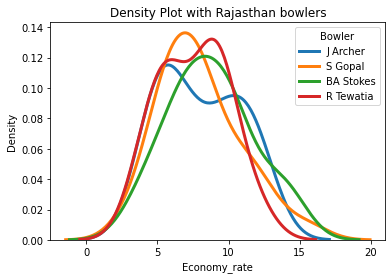

In [59]:
# List of 4 Rajasthan bowlers who are playing today 
RR_bowlers = ['J Archer', 'S Gopal','BA Stokes','R Tewatia']
# Iterate through the 4 bowlers
for bowler in RR_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RRKKR[df_economy_rate_RRKKR['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with Rajasthan bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

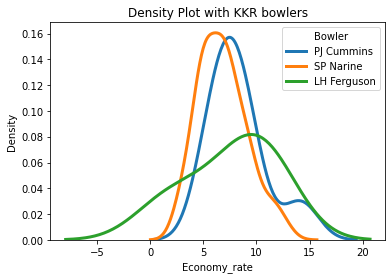

In [60]:
# List of 3 KKR bowlers who are playing today 
KKR_bowlers = ['PJ Cummins', 'SP Narine','LH Ferguson']
# Iterate through the 4 bowlers
for bowler in KKR_bowlers:
    # Subset to the bowler
    subset = df_economy_rate_RRKKR[df_economy_rate_RRKKR['bowler'] == bowler]
    
    # Draw the density plot
    sns.distplot(subset['economy_rate'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = bowler)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Bowler')
plt.title('Density Plot with KKR bowlers')
plt.xlabel('Economy_rate')
plt.ylabel('Density')

**Conclusion :-**




*   From above RR and KKR density plots i can say Sunile narine and shreyas gopal has economy rate less than 8 in most of the matches.
*   So i am predicting in today match only 2 bowlers will have economy rate less than 8.



